In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = 'C:\\Users\\Akshay\\Downloads\\Machine Learning Competition\\Analytics Vidhya\\MNIST\\Images'

test_path = data_dir+'\\Test\\'
train_path = data_dir+'\\Train\\'

In [3]:
train = pd.read_csv(os.path.join(train_path, 'train.csv'))
test = pd.read_csv(os.path.join(test_path, 'Test_fCbTej3_0j1gHmj.csv'))

In [4]:
os.listdir(train_path)[0]

'0.png'

4


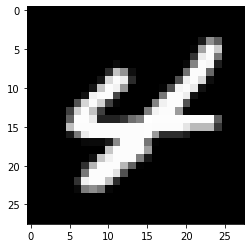

In [5]:
train_image = train_path+'0.png'
plt.imshow(plt.imread(train_image))
print(train.label[0])

9


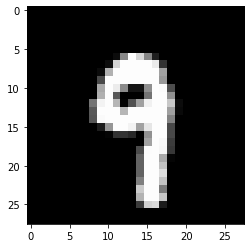

In [6]:
train_image = train_path+'1.png'
plt.imshow(plt.imread(train_image))
print(train.label[1])

In [7]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [8]:
plt.imread(train_image).shape

(28, 28, 4)

In [9]:
import random
from skimage.transform import resize
l1 = []
i = random.choice(train.index)
img_name = train.filename[i]
for i in train.filename:
    img_path = os.path.join(data_dir, 'Train', i)
    img = plt.imread(img_path)
    img = resize(img, (28, 28))
    img = img.astype('float32')
    l1.append(img)
train_x = np.stack(l1)

In [10]:
l1 = []
i = random.choice(test.index)
img_name = test.filename[i]
for i in test.filename:
    img_path = os.path.join(data_dir, 'Test', i)
    img = plt.imread(img_path)
    img = resize(img, (28, 28))
    img = img.astype('float32')
    l1.append(img)
test_x = np.stack(l1)

In [11]:
train_x = train_x/255
test_x = test_x/255

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import keras
train_y = le.fit_transform(train.label)
train_y = keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.


In [13]:
train_x.shape

(49000, 28, 28, 4)

In [14]:
test_x.shape

(21000, 28, 28, 4)

In [15]:
train_y.shape

(49000, 10)

In [23]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization

In [24]:
image_shape = (28, 28, 4)
batch_size = 128

In [25]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape= image_shape, activation='relu'))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        2368      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [27]:
model.fit(train_x, train_y, epochs=20, batch_size = batch_size)

Epoch 1/20
49000/49000 [==============================] - 137s 3ms/step - loss: 0.1054 - accuracy: 0.9676
Epoch 2/20
49000/49000 [==============================] - 130s 3ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 3/20
49000/49000 [==============================] - 148s 3ms/step - loss: 0.0278 - accuracy: 0.9915
Epoch 4/20
49000/49000 [==============================] - 155s 3ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 5/20
49000/49000 [==============================] - 155s 3ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 6/20
49000/49000 [==============================] - 155s 3ms/step - loss: 0.0124 - accuracy: 0.9962
Epoch 7/20
49000/49000 [==============================] - 155s 3ms/step - loss: 0.0128 - accuracy: 0.9958
Epoch 8/20
49000/49000 [==============================] - 162s 3ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 9/20
49000/49000 [==============================] - 156s 3ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 10/20
49000/49000 [=====================

In [28]:
pred = model.predict_classes(test_x)

In [29]:
pred = le.inverse_transform(pred)

In [30]:
test['label'] = pred

In [31]:
test.to_csv('MN4.csv', index= False)